# Solving ticket pricing problem using binary-coded GA

In [1]:
import numpy as np
import random
from tqdm.notebook import tqdm
from copy import copy
import matplotlib.pyplot as plt

### Define the problem

In [2]:
def profit(x):
    return -20*x*x+6200*x-350000

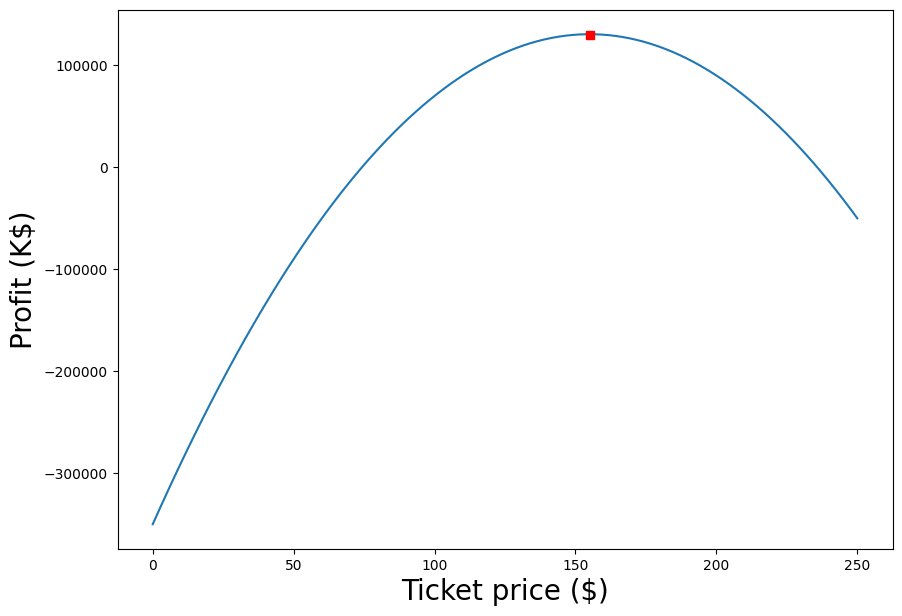

In [3]:
# Plot proft-ticket price curve
plt.figure(figsize=(10, 7))
x = np.linspace(0, 250, 100)
plt.plot(x, profit(x))

# Plot the optima
plt.plot(155, 130000, "s", color="r")

# Add title and axis names
plt.xlabel("Ticket price ($)", fontsize=20)
plt.ylabel("Profit (K$)", fontsize=20)
plt.show()
# plt.savefig("CH01_F05_Pricing.png", format="png", dpi=300)

### Generate an initial random population

In [4]:
def init_pop(pop_size, chromosome_length):
    ints = [random.randint(75,235) for i in range(pop_size)]
    strs = [bin(n)[2:].zfill(chromosome_length) for n in ints]
    bins = [[int(x) for x in n] for n in strs]
    return bins

### Fitness function

For a given population, calculate the fitness of each element in the population. This fitness function essentially determines how “good” a particular offspring is. It first converts each unit in the population to a binary number (the genotype), and then returns the “best” offspring.

In [5]:
def fitness_score(population):
    fitness_values = []
    num = []
    for i in range(len(population)):
        num.append(int("".join(str(x) for x in population[i]), base=2))  # convert binary to decimal
        fitness_values.append(profit(num[i]))
    tuples = zip(*sorted(zip(fitness_values,population),reverse=True))
    fitness_values, population = [list(t) for t in tuples]
    return fitness_values, population

### Random parent selection

In [6]:
def select_parent(population, num_parents):
    parents=random.sample(population, num_parents)
    return parents

### Roulette Wheel Selection

In [7]:
def roulette_wheel_selection(population, num_parents):
    # Calculate total fitness
    fitness_values, population = fitness_score(population)
    total_fitness = sum(fitness_values)

    # Calculate selection probabilities for each individual
    probabilities = [fitness / total_fitness for fitness in fitness_values]

    # Perform roulette wheel selection
    selected_parents = []
    for i in range(num_parents):  # Select only 2 parents
        # Pick a random number between 0 and 1
        r = random.random()

        # Find the individual whose cumulative probability includes r
        cumulative_probability = 0
        for j in range(len(population)):
            cumulative_probability += probabilities[j]
            if cumulative_probability > r:
                selected_parents.append(population[j])
                break

    return selected_parents

### Apply 1-point crossover

In [8]:
def crossover(parents, crossover_prob): 
    chromosome_length = len(parents[0]) 
    if crossover_prob > random.random():
        cross_point = random.randint(0,chromosome_length)
        parents+= tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:])])
        parents+= tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:])])
    return parents

### Mutation 
Alter each gene independently with a probability mutation_prob

In [9]:
def mutation(population, mutation_prob) :
    chromosome_length = len(population[0])
    for i in range(len(population)) :
        for j in range(chromosome_length-1) :
            if mutation_prob > random.random():
                if population[i][j]==1:
                    population[i][j]=0
                else:
                    population[i][j]=1
    return population

### Binary-coded Genetic Algorithm

In [10]:
def BGA(population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm = False):
    states = []
    best_solution = []
    best_score = 0
    if use_tqdm: pbar = tqdm(total=num_gen)
    for _ in range(num_gen):
        if use_tqdm: pbar.update()
        # Get population fitness
        scores, population = fitness_score(population)
        current_best_score = scores[0]
        current_best_solution = population[0]
        states.append(current_best_score)
        if current_best_score > best_score: 
            best_score = current_best_score
            best_solution = int("".join(str(x) for x in copy(current_best_solution)), base=2)
        parents = select_parent(population, num_parents)
        # parents = roulette_wheel_selection(population, num_parents) # uncomment this line to use roulette wheel selection
        parents = crossover(parents, crossover_prob)
        population = mutation(population,mutation_prob)
    return best_solution, best_score, states

### Set algorithm parameters

In [11]:
num_gen = 1000
pop_size = 5
crossover_prob = 0.7
mutation_prob = 0.3
num_parents = 2

# Solution representation
chromosome_length = 8
best_score = -100000 

# Initialize the "best solution"
population = init_pop(pop_size, chromosome_length)
print("Initial population: \n", population)

Initial population: 
 [[1, 1, 1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1, 0], [1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 0, 0, 0, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0]]


### Run the solver

In [12]:
best_solution, best_score, states = BGA(population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

### Print the results

Optimal ticket price ($): 155
Profit ($): 130500


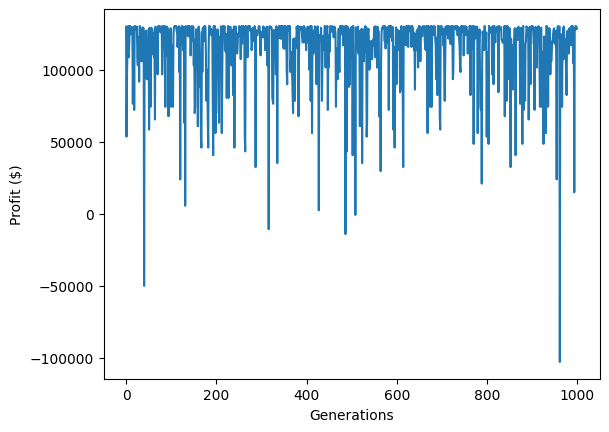

In [13]:
print(f"Optimal ticket price ($): {best_solution}")
print(f"Profit ($): {best_score}")
plt.plot(states)
plt.xlabel("Generations")
plt.ylabel("Profit ($)")
plt.show()